# Advertising Sales Prediction 📈📊🛒

## 1️⃣ Required Libraries

In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## 2️⃣ Read the Dataset

In [2]:
path = r'Dataset\Advertising.csv'
df = pd.read_csv(path)

In [3]:
df.shape

(200, 5)

In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## 3️⃣ Exploratory Data Analysis (EDA)

### Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


### Description

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


### Check Columns

In [7]:
cols = df.columns
cols

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [8]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Check Missing Values

In [10]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### Check Duplication

In [11]:
df.duplicated().sum()

0

### Analysis Columns

#### Histogram + KDE

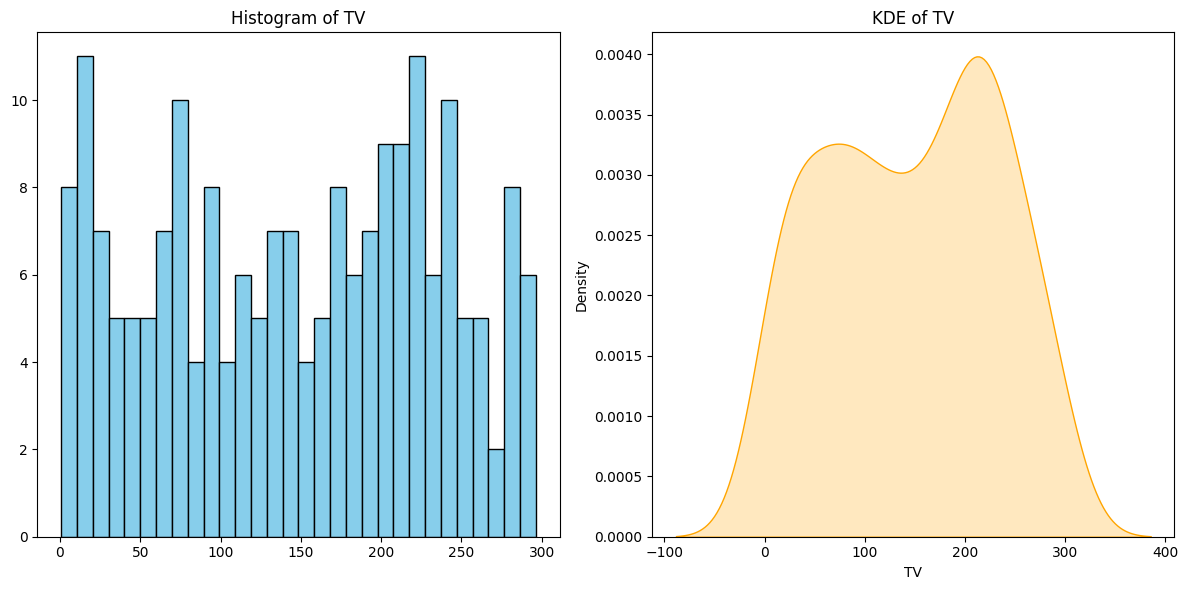

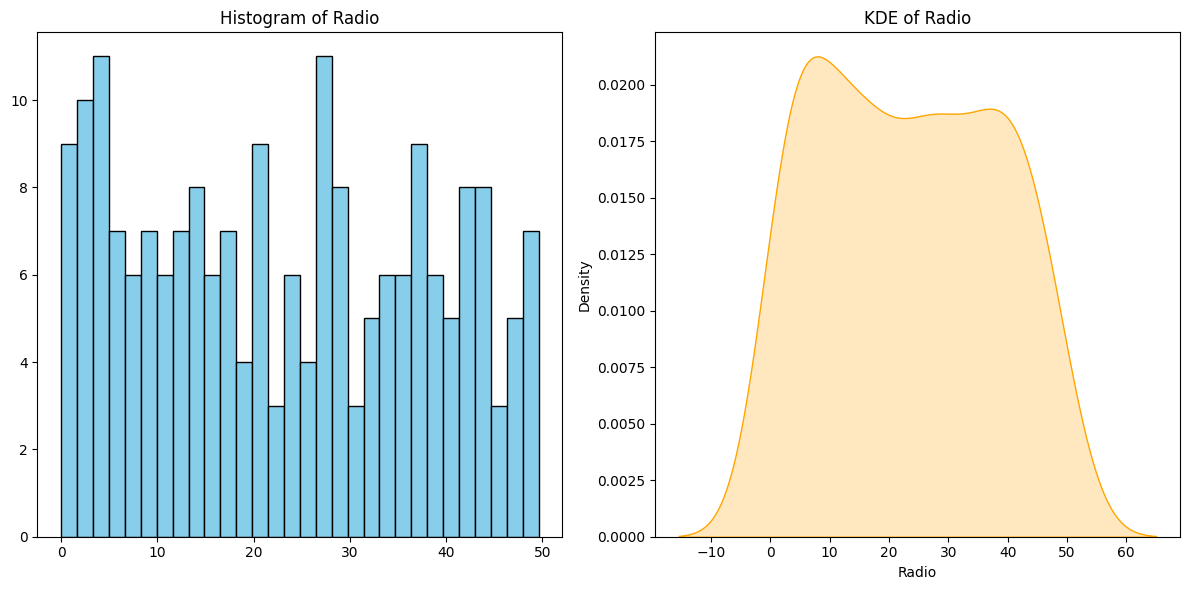

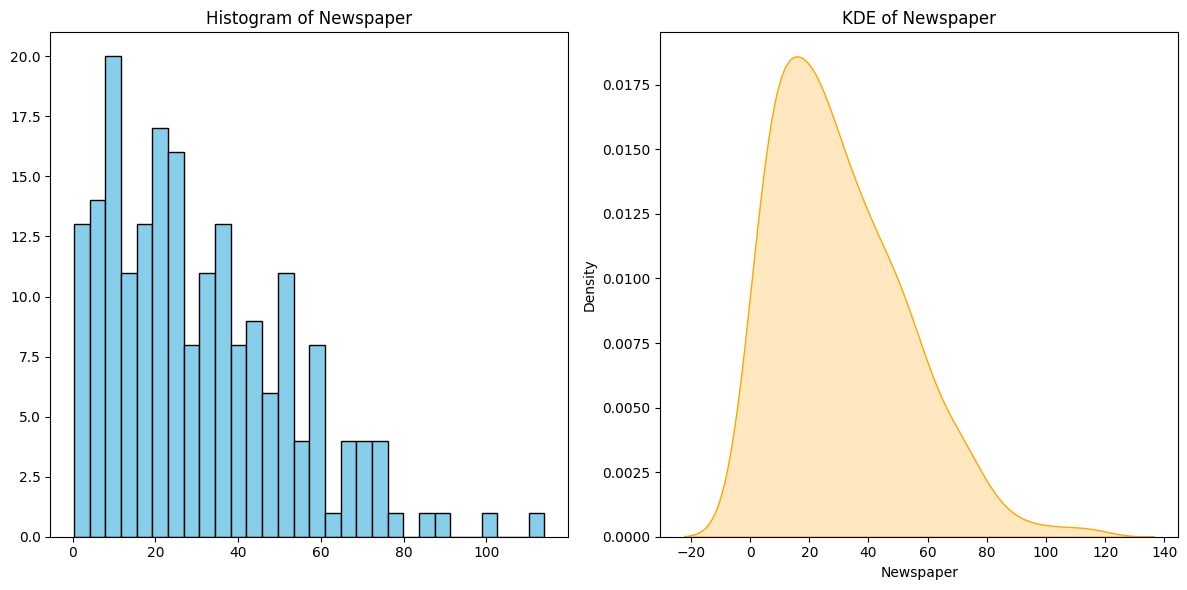

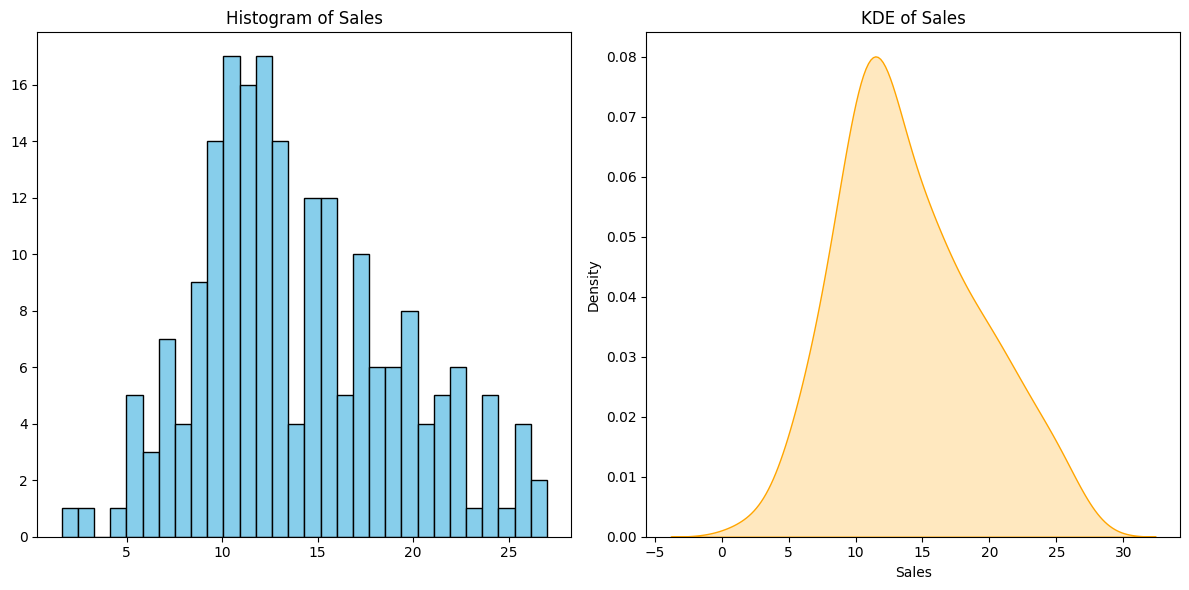

In [12]:
for i in cols[1:]:
    plt.figure(figsize=(12,6))
    plt.subplot(1, 2, 1)  
    plt.hist(df[i], bins=30, color='skyblue' , edgecolor='black')
    plt.title(f'Histogram of {i}')

    plt.subplot(1, 2, 2)  
    sns.kdeplot(df[i], color='orange' , fill=True)
    plt.title(f'KDE of {i}')

    plt.tight_layout()
    plt.show()

#### Boxplot + Violinplot

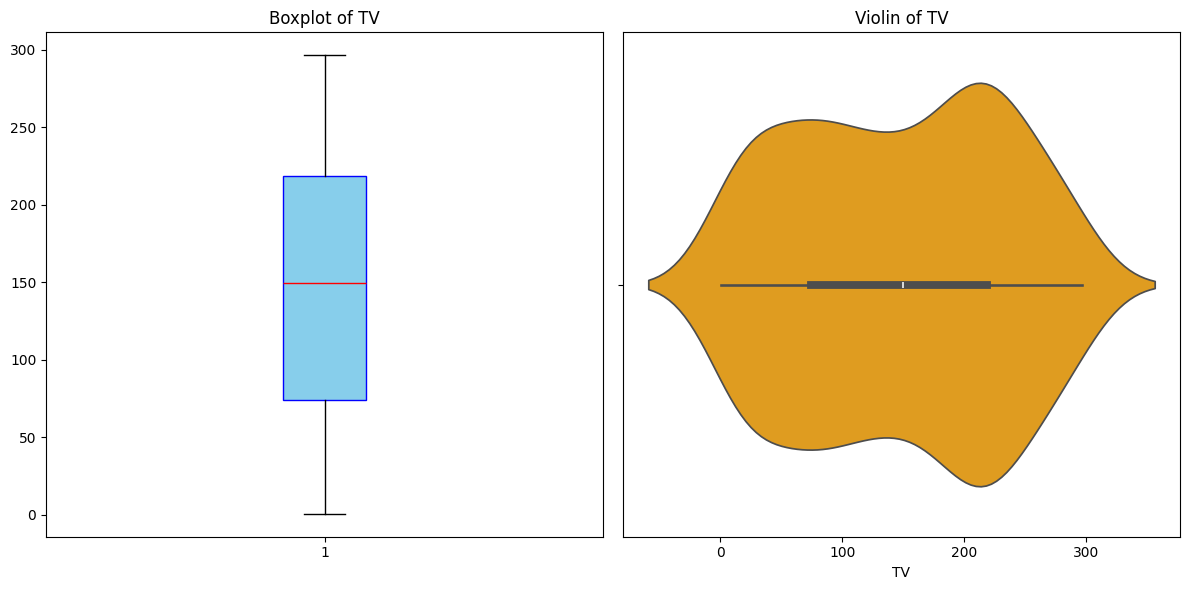

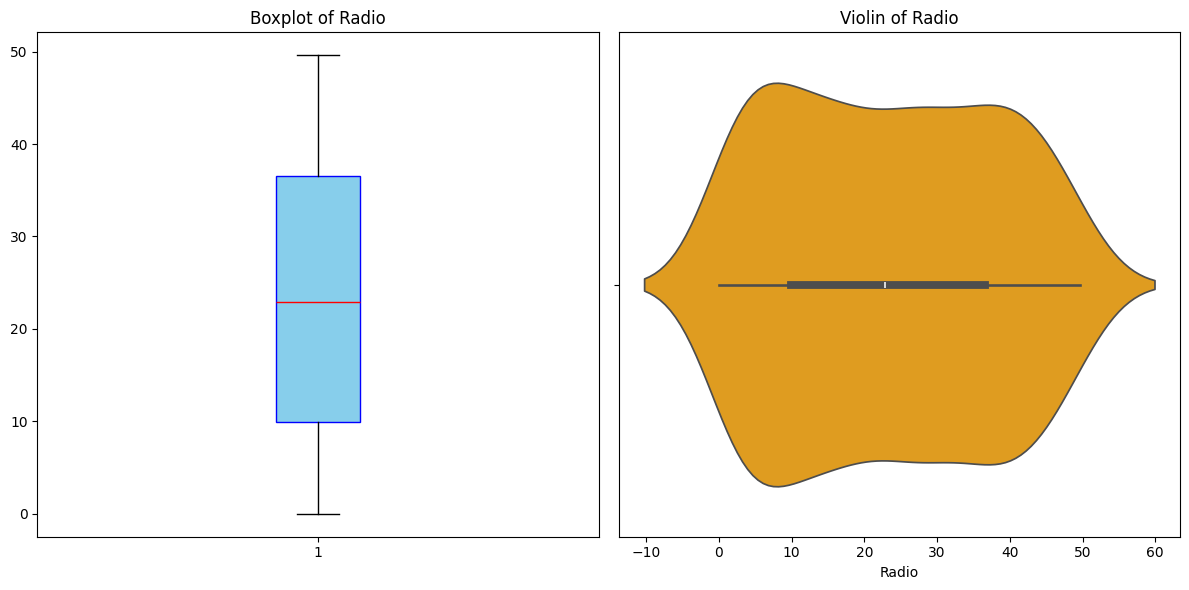

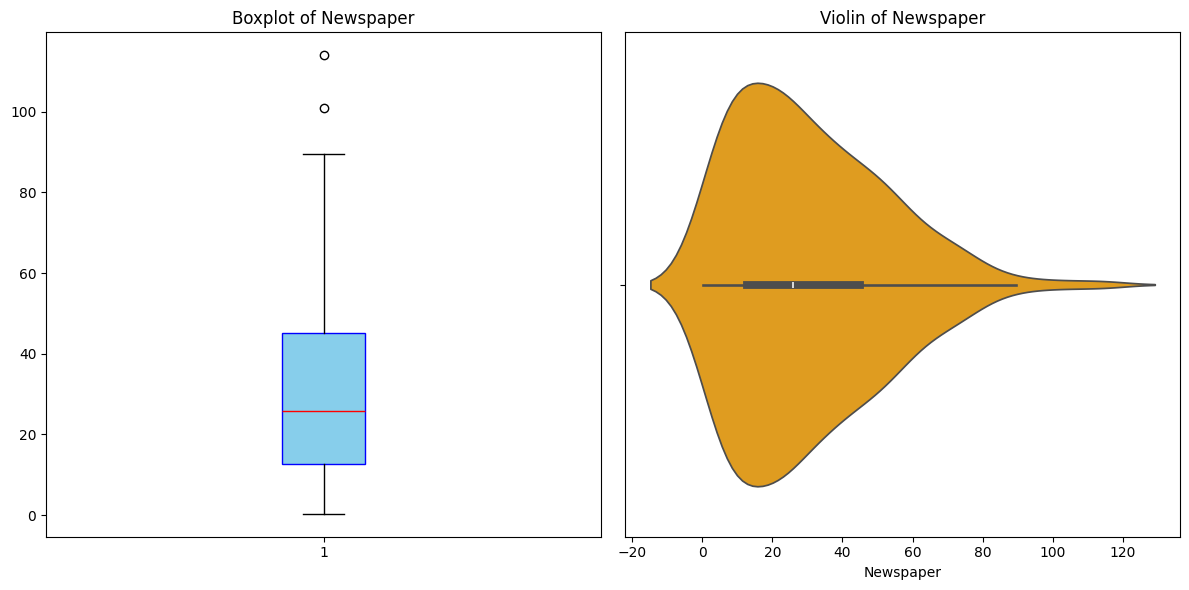

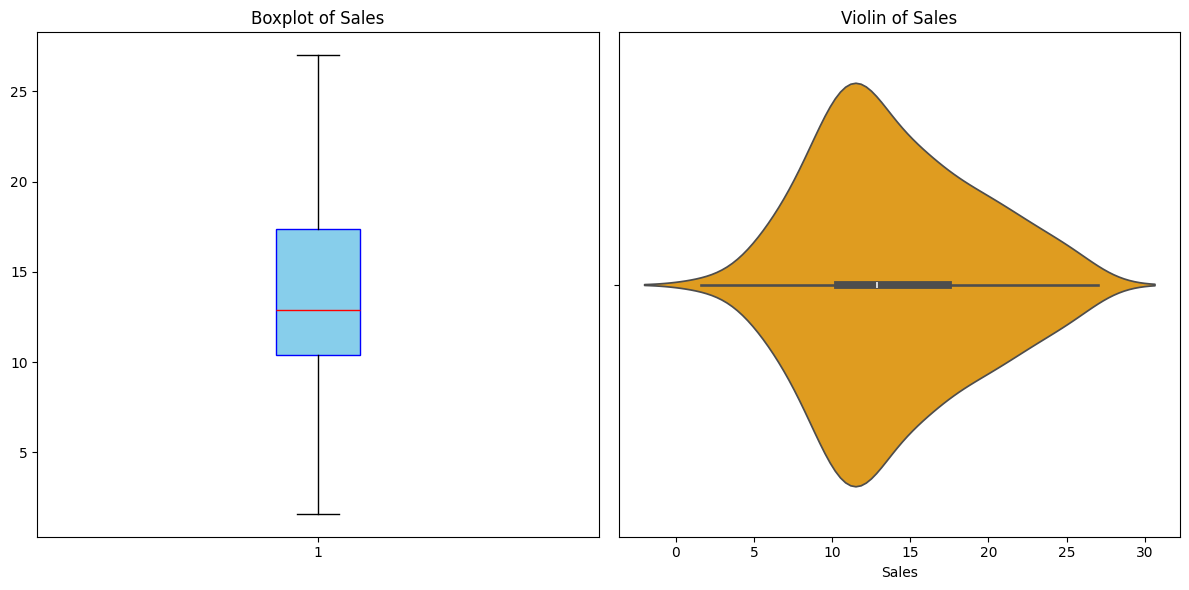

In [13]:
for i in cols[1:]:
    plt.figure(figsize=(12,6))
    
    plt.subplot(1, 2, 1)  
    plt.boxplot(df[i], patch_artist=True, 
                boxprops=dict(facecolor='skyblue', color='blue'),
                medianprops=dict(color='red'))
    plt.title(f'Boxplot of {i}')

    plt.subplot(1, 2, 2)  
    sns.violinplot(x=df[i], color='orange')
    plt.title(f'Violin of {i}')

    plt.tight_layout()
    plt.show()

#### Correlation Matrix

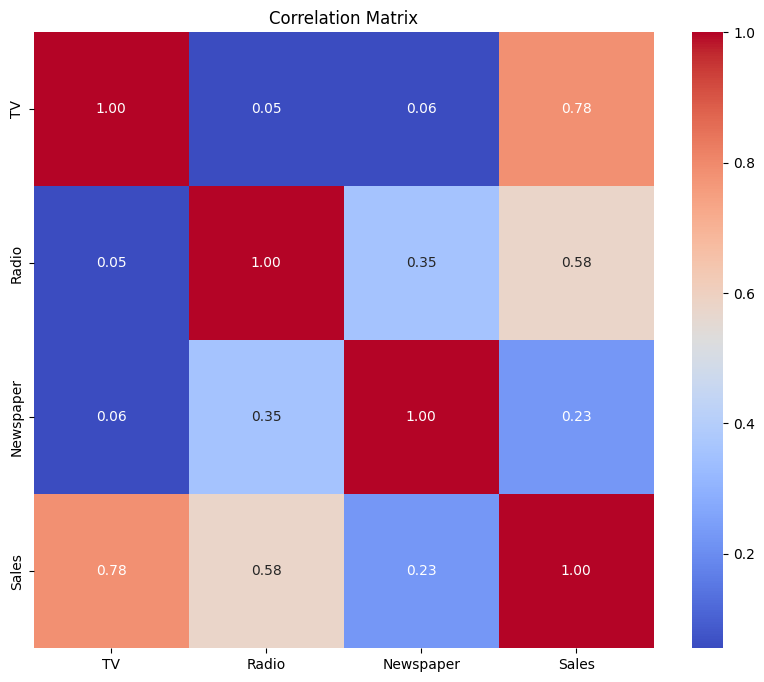

In [14]:
corr = df[cols[1:]].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#### Check Relations

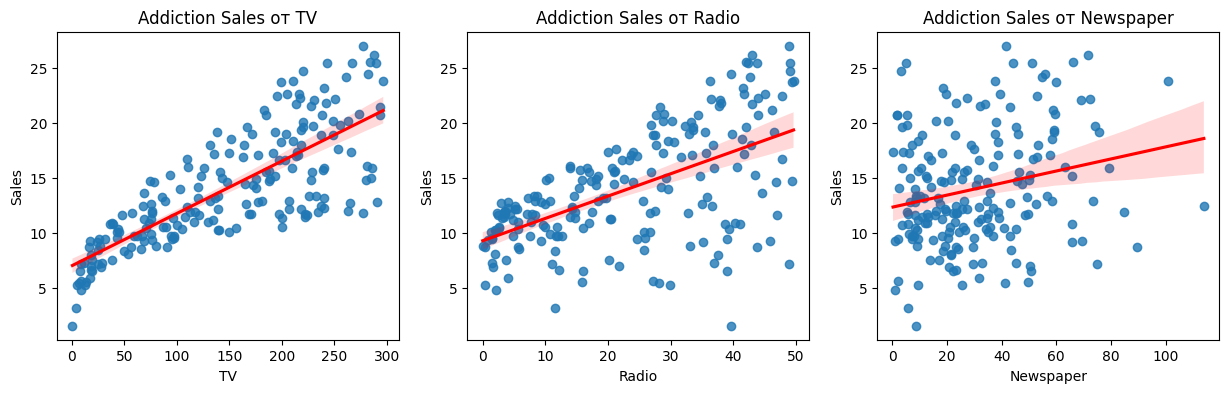

In [15]:
plt.figure(figsize=(15, 4))

for i, col in enumerate(["TV", "Radio", "Newspaper"]):
    plt.subplot(1, 3, i + 1)
    sns.regplot(data=df, x=col, y="Sales", line_kws={'color':'red'})
    plt.title(f"Addiction Sales от {col}")
    plt.xlabel(col)
    plt.ylabel("Sales")

## 4️⃣ Feature Engineering

In [16]:
df["TV_Radio"] = df["TV"] * df["Radio"]

In [17]:
df.head()

,TV,Radio,Newspaper,Sales,TV_Radio
0,230.1,37.8,69.2,22.1,8697.78
1,44.5,39.3,45.1,10.4,1748.85
2,17.2,45.9,69.3,9.3,789.48
3,151.5,41.3,58.5,18.5,6256.95
4,180.8,10.8,58.4,12.9,1952.64


## 5️⃣ Split Data into Features and Target

In [18]:
X = df.drop(columns=['Sales'])
y = df['Sales']

In [19]:
X.head()

,TV,Radio,Newspaper,TV_Radio
0,230.1,37.8,69.2,8697.78
1,44.5,39.3,45.1,1748.85
2,17.2,45.9,69.3,789.48
3,151.5,41.3,58.5,6256.95
4,180.8,10.8,58.4,1952.64


## 6️⃣ Split Data into Train and Test Sets

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_train.head()

,TV,Radio,Newspaper,TV_Radio
79,116.0,7.7,23.1,893.20
197,177.0,9.3,6.4,1646.10
38,43.1,26.7,35.1,1150.77
24,62.3,12.6,18.3,784.98
122,224.0,2.4,15.6,537.60


## 7️⃣ Modeling

### Linear Regression

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
y_pred_linear = model.predict(X_test)

In [24]:
results = {}

mae = mean_absolute_error(y_test, y_pred_linear)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2 = r2_score(y_test, y_pred_linear)

print("📊 Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

results['Linear Regression'] = {"MAE": mae, "RMSE": rmse, "R²": r2}

📊 Model Performance:
Mean Absolute Error (MAE): 0.67
Root Mean Squared Error (RMSE): 0.90
R² Score: 0.97


In [25]:
print("Coefficient", model.coef_)

Coefficient [0.01961507 0.03397467 0.00190677 0.00104987]


Text(0.5, 1.0, 'Comparison of actual and predicted sales')

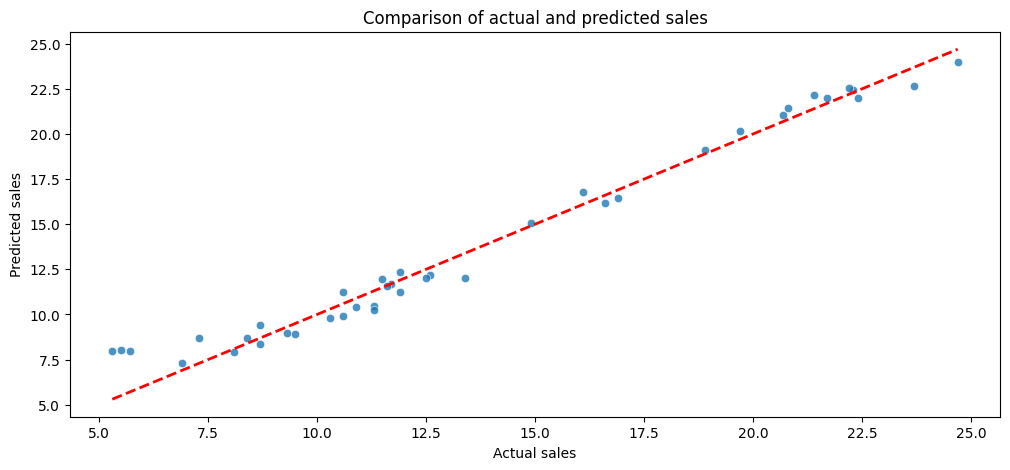

In [26]:
plt.figure(figsize=(12, 5))

sns.scatterplot(x=y_test, y=y_pred_linear, alpha=0.8)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.xlabel("Actual sales")
plt.ylabel("Predicted sales")
plt.title("Comparison of actual and predicted sales")

### Decision Tree

In [27]:
model = DecisionTreeRegressor(max_depth=4, min_samples_leaf=10)
model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [28]:
y_pred_tree = model.predict(X_test)

In [29]:
mae = mean_absolute_error(y_test, y_pred_tree)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_tree))
r2 = r2_score(y_test, y_pred_tree)

print("📊 Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

results['Decision Tree'] = {"MAE": mae, "RMSE": rmse, "R²": r2}

📊 Model Performance:
Mean Absolute Error (MAE): 0.96
Root Mean Squared Error (RMSE): 1.21
R² Score: 0.95


Text(0.5, 1.0, 'Comparison of actual and predicted sales')

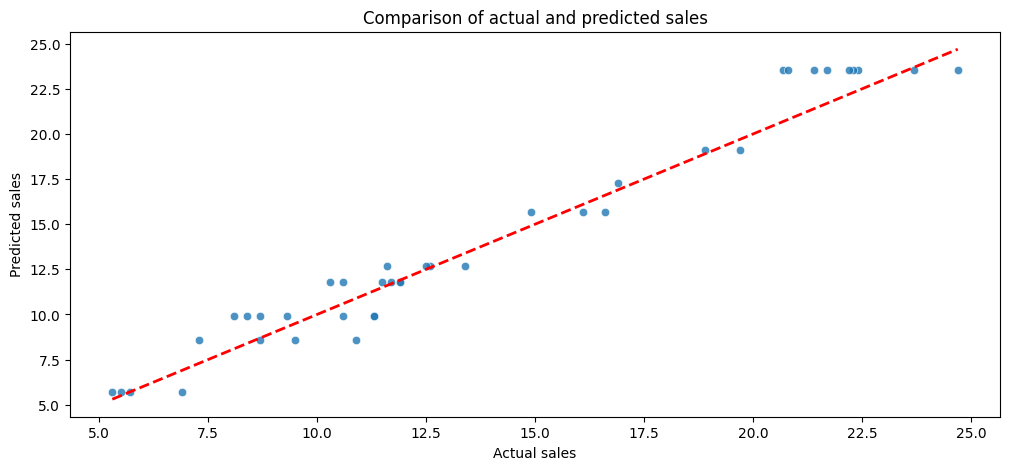

In [30]:
plt.figure(figsize=(12, 5))

sns.scatterplot(x=y_test, y=y_pred_tree, alpha=0.8)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.xlabel("Actual sales")
plt.ylabel("Predicted sales")
plt.title("Comparison of actual and predicted sales")

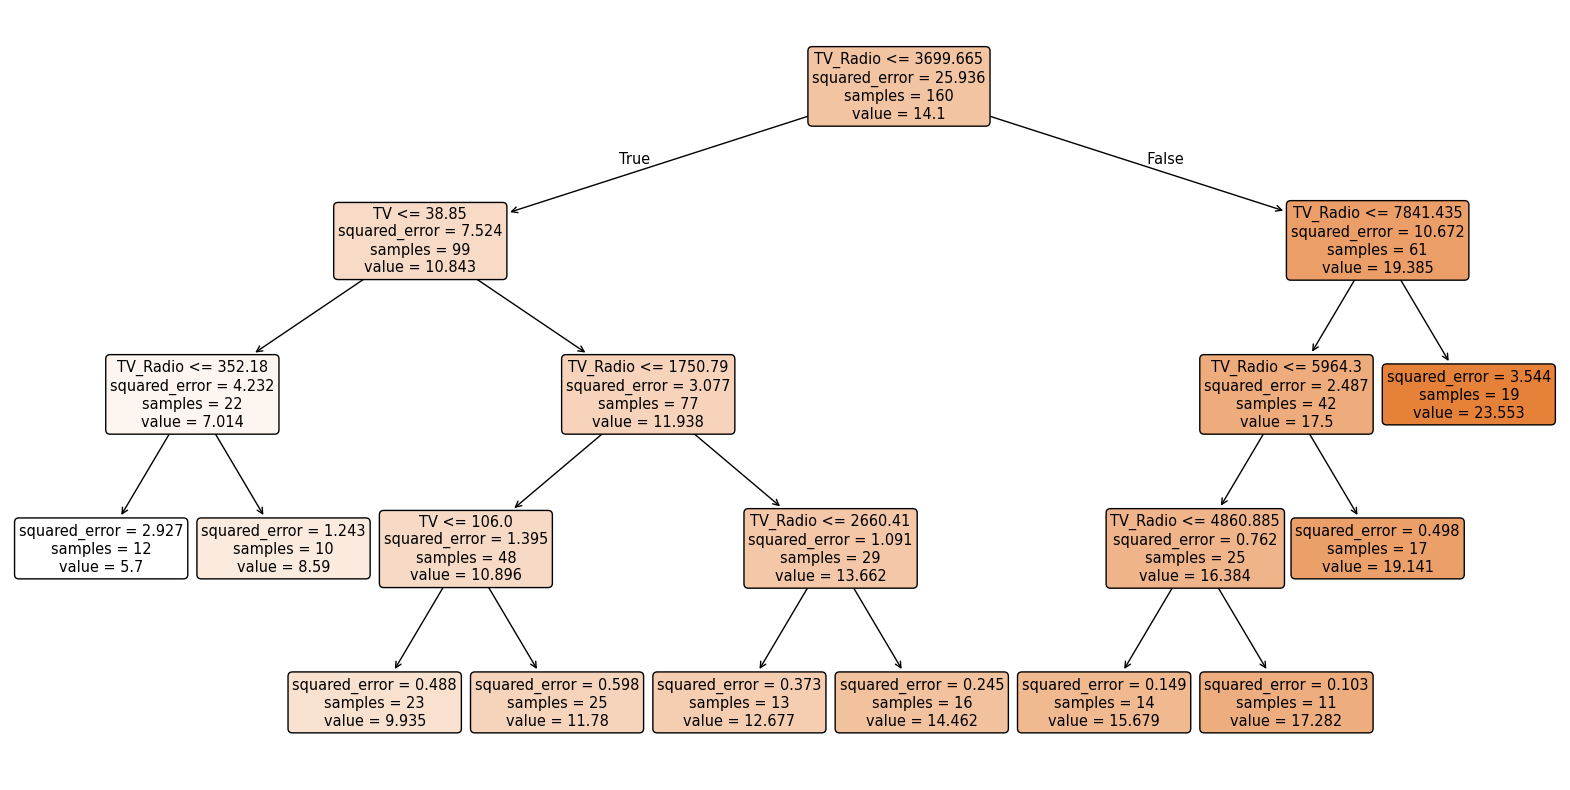

In [31]:
plt.figure(figsize=(20,10))
plot_tree(
    model,
    feature_names=X_train.columns,
    filled=True,
    rounded=True
)
plt.show()

### SVM

In [32]:
model = SVR()
model.fit(X_train, y_train)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [33]:
y_pred_svm = model.predict(X_test)

In [34]:
mae = mean_absolute_error(y_test, y_pred_svm)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_svm))
r2 = r2_score(y_test, y_pred_svm)

print("📊 Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

results['SVM'] = {"MAE": mae, "RMSE": rmse, "R²": r2}

📊 Model Performance:
Mean Absolute Error (MAE): 0.96
Root Mean Squared Error (RMSE): 1.44
R² Score: 0.93


Text(0.5, 1.0, 'Comparison of actual and predicted sales')

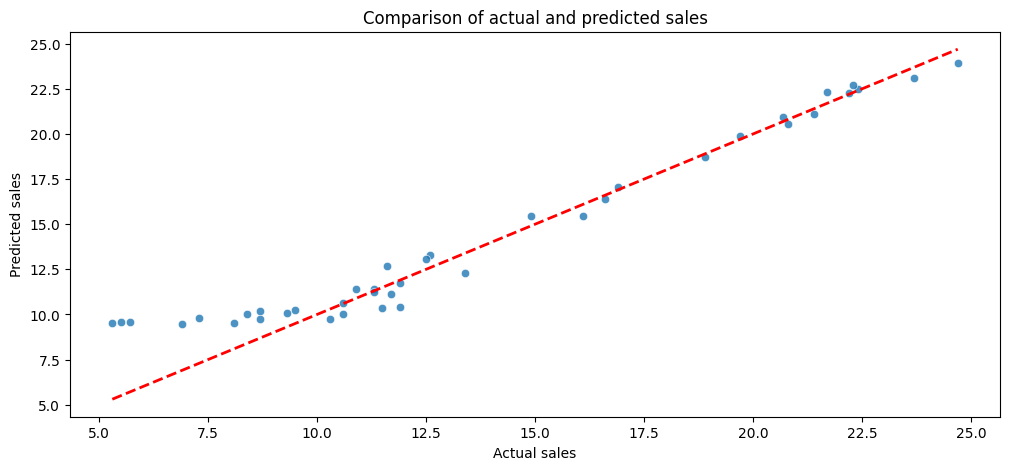

In [35]:
plt.figure(figsize=(12, 5))

sns.scatterplot(x=y_test, y=y_pred_svm, alpha=0.8)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.xlabel("Actual sales")
plt.ylabel("Predicted sales")
plt.title("Comparison of actual and predicted sales")

### Models evaluation

In [36]:
results_df = pd.DataFrame(results).T.sort_values("R²", ascending=False)
print(results_df)

                        MAE      RMSE        R²
Linear Regression  0.671804  0.902458  0.974197
Decision Tree      0.958376  1.211522  0.953498
SVM                0.956762  1.435824  0.934685


C:\Users\moham\AppData\Local\Temp\ipykernel_25800\409788003.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df["R²"], palette="viridis")
C:\Users\moham\AppData\Local\Temp\ipykernel_25800\409788003.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df["MAE"], palette="coolwarm_r")
C:\Users\moham\AppData\Local\Temp\ipykernel_25800\409788003.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df["RMSE"], palette="coolwarm_r")


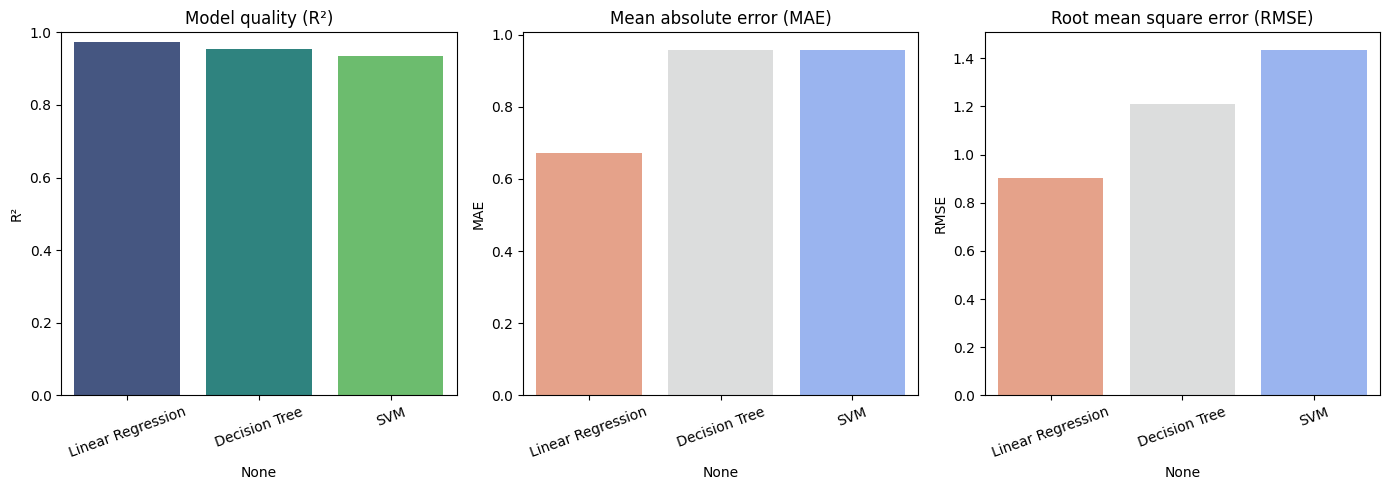

In [37]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
sns.barplot(x=results_df.index, y=results_df["R²"], palette="viridis")
plt.title("Model quality (R²)")
plt.ylim(0, 1)
plt.ylabel("R²")
plt.xticks(rotation=20)

plt.subplot(1, 3, 2)
sns.barplot(x=results_df.index, y=results_df["MAE"], palette="coolwarm_r")
plt.title("Mean absolute error (MAE)")
plt.ylabel("MAE")
plt.xticks(rotation=20)

plt.subplot(1, 3, 3)
sns.barplot(x=results_df.index, y=results_df["RMSE"], palette="coolwarm_r")
plt.title("Root mean square error (RMSE)")
plt.ylabel("RMSE")
plt.xticks(rotation=20)

plt.tight_layout()
plt.show()